# Import

In [1]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',60)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

# Data cleaning

## Load and check

In [2]:
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

data.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

## Data type and missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### convert data type

In [4]:
data = data.replace({'Not Available':np.nan})

for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [5]:
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

## Dealing with missing values

In [8]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0: 'Missing Values', 1:'% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values',ascending = False).round(1)
    
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + 
         ' columns that have missing values')
    
    return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

In [11]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values
We will remove 11 columns


In [12]:
data = data.drop(list(missing_columns),axis = 1)

# EDA

Text(0.5, 1.0, 'Energy Star Score Distribution')

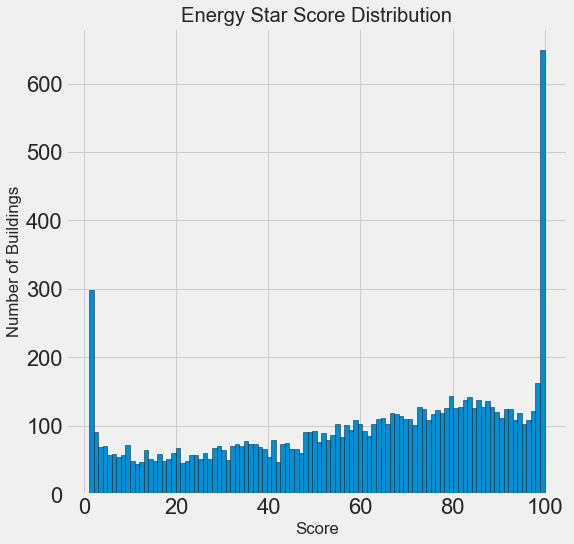

In [13]:
figsize(8,8)

data = data.rename(columns = {'ENERGY STAR Score':'score'})

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

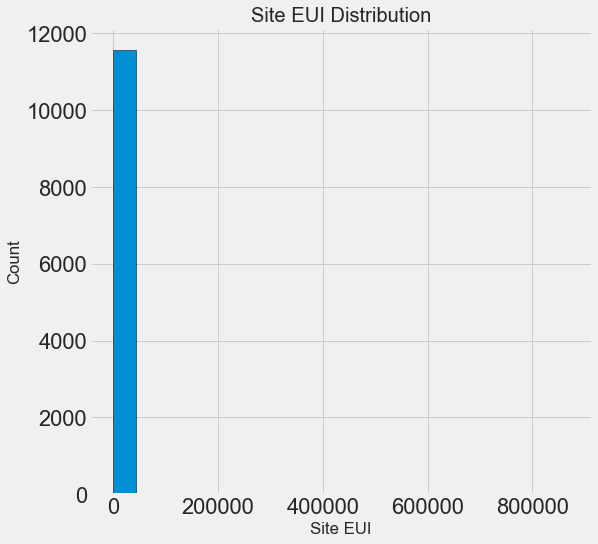

In [14]:
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [15]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [17]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, : ]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

## Remove outlier

In [18]:
first_quantile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quantile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quantile - first_quantile

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quantile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quantile + 3*iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

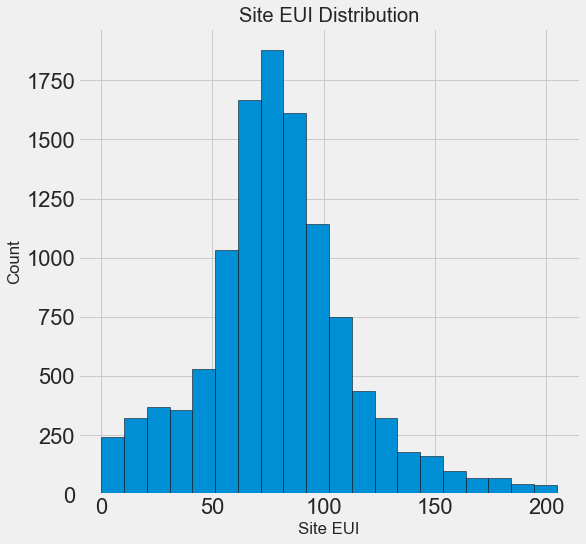

In [19]:
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

## Finding connections

In [20]:
types = data.dropna(subset=['score'])
Alltypes_num = types['Largest Property Use Type'].value_counts()

In [21]:
print(Alltypes_num)

Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Parking                                     3
Wholesale Club/Supercenter                  3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64


In [22]:
types = list(Alltypes_num[Alltypes_num.values > 90].index)
print(types)

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse', 'K-12 School', 'Residence Hall/Dormitory']


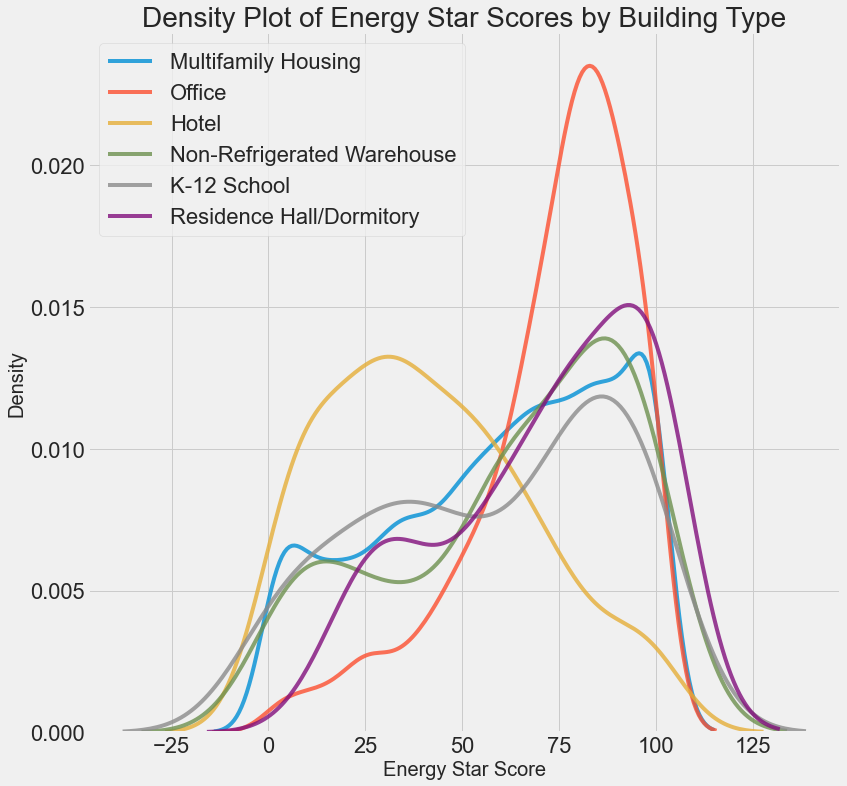

In [26]:
figsize(12,12)

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['score'].dropna(),label = b_type, shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)
plt.legend()

In [27]:
boroughs = data.dropna(subset=['score'])
Allboroughs_num = boroughs['Borough'].value_counts()

In [28]:
print(Allboroughs_num)

Manhattan        3985
Brooklyn         1947
Queens           1707
Bronx            1655
Staten Island     119
Name: Borough, dtype: int64


In [29]:
boroughs = list(Allboroughs_num[Allboroughs_num.values > 100].index)
print(boroughs)

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']


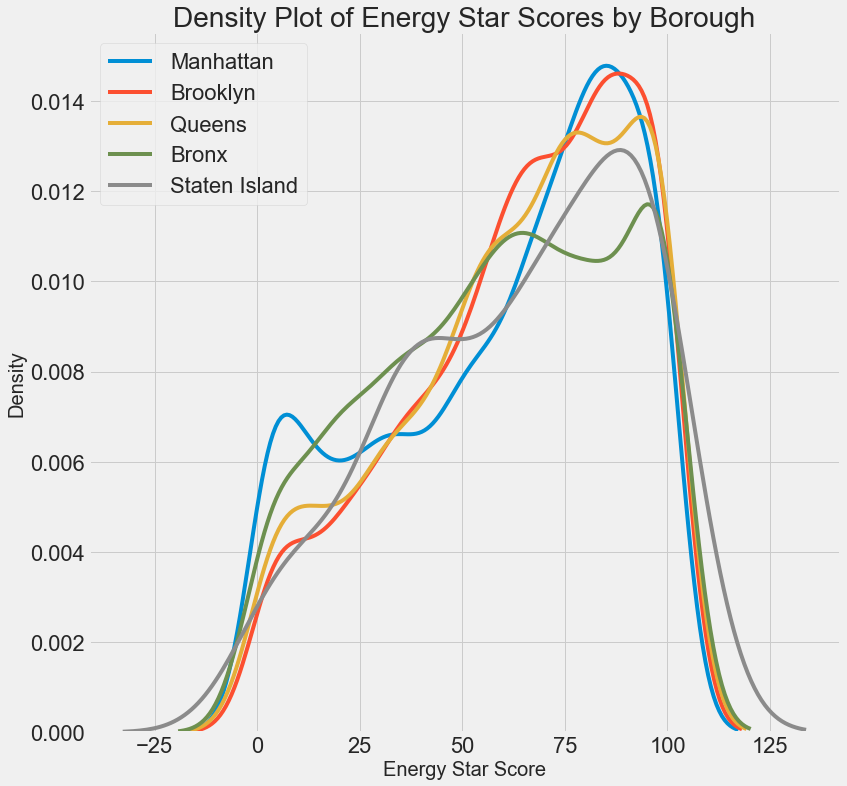

In [32]:
figsize(12,12)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(),label = borough)
    
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)
plt.legend()

## Correlations between features and target

In [33]:
correlations_data = data.corr()['score'].sort_values()

print(correlations_data.head(15),'\n')
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [34]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_ ' + col ] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['Borough','Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset],axis=1)

features = features.dropna(subset = ['score'])

correlations = features.corr()['score'].dropna().sort_values()

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
correlations.head(15)

Site EUI (kBtu/ft²)                                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)                          -0.713993
sqrt_ Site EUI (kBtu/ft²)                                       -0.699817
sqrt_ Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_ Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_ Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                        -0.645542
Source EUI (kBtu/ft²)                                           -0.641037
log_Source EUI (kBtu/ft²)                                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                    -0.620329
log_Site EUI (kBtu/ft²)                                         -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                      -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)     -0.424246
sqrt_ Weather Normalized Site Electric

In [36]:
correlations.tail(15)

sqrt_ Order                                                        0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_ Community Board                                              0.058029
sqrt_ Council District                                             0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

## Two-Variable Plots

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

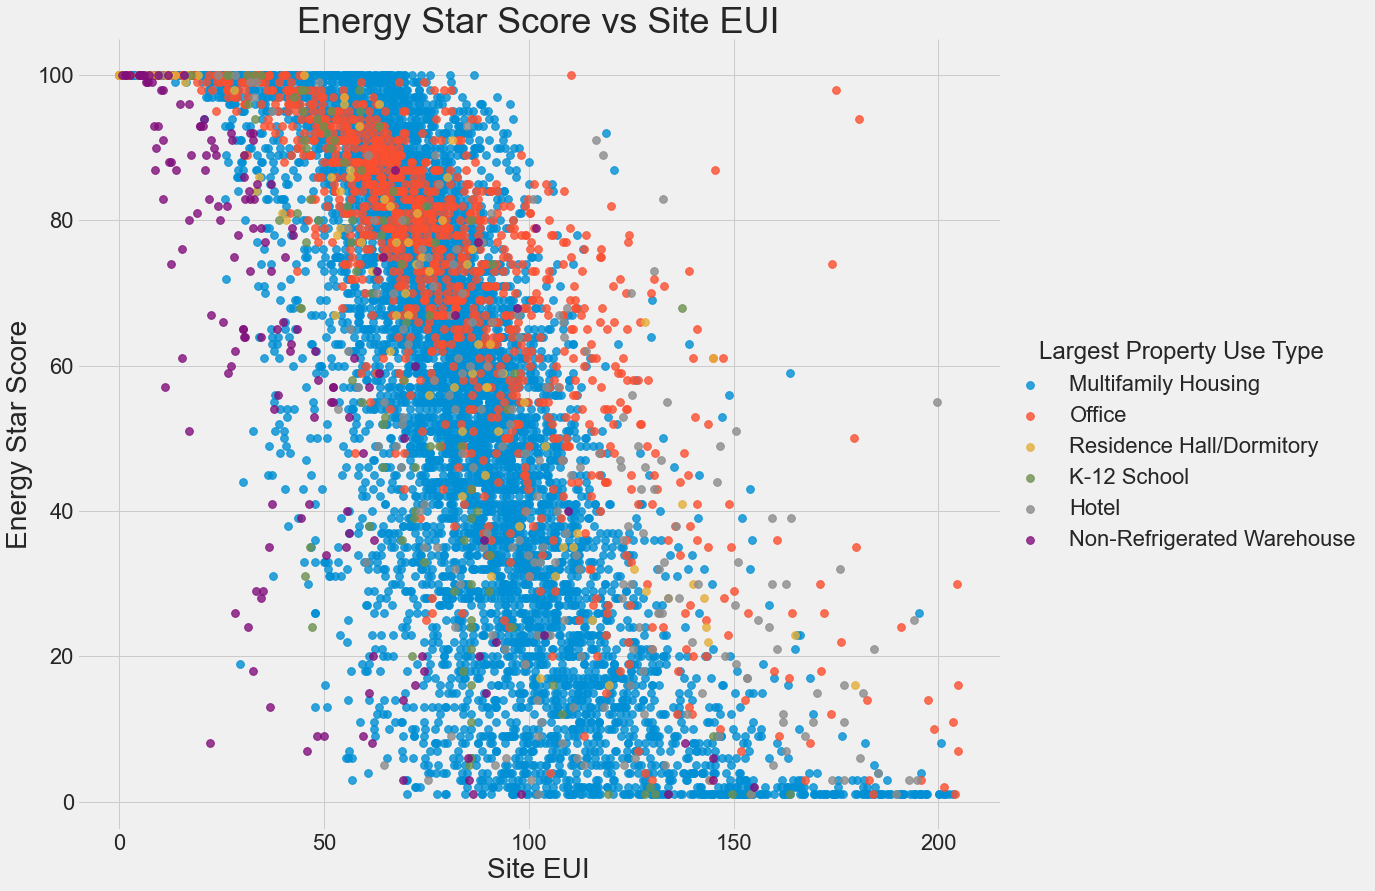

In [40]:
figsize(12,10)

features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot('Site EUI (kBtu/ft²)','score',
           hue = 'Largest Property Use Type',
           data = features,
           scatter_kws = {'alpha':0.8, 's':60},
           fit_reg = False,
           size = 12,
           aspect = 1.2)

plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 1.02, 'Pairs Plot of Energy Data')

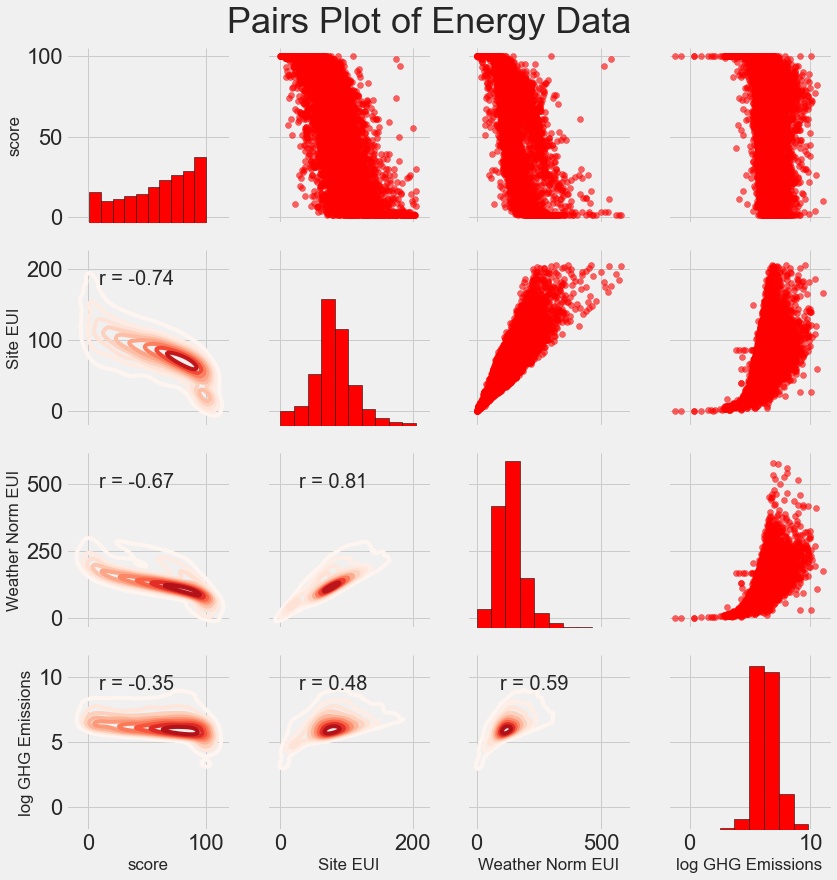

In [42]:
plot_data = features[['score',
                      'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)',
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)':'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

plot_data = plot_data.dropna()

def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
                xy = (.2,.8),
                xycoords = ax.transAxes,
                size = 20)
    
grid = sns.PairGrid(data = plot_data,size = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)

# Feature engineering and selection

## Feature engineering 

In [43]:
features = data.copy()

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = data[['Borough','Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset],axis = 1)

features.shape

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

## Feature selection

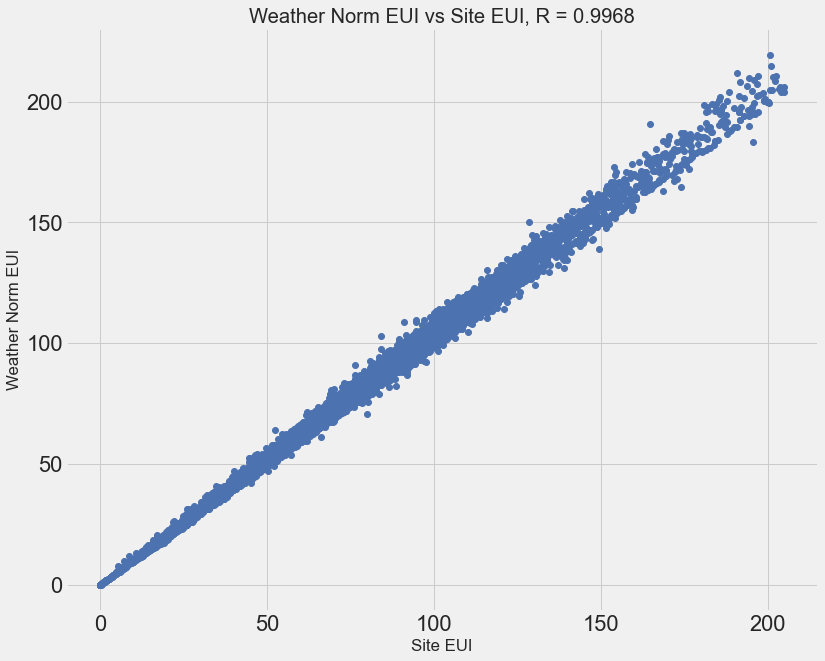

In [44]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'],plot_data['Weather Normalized Site EUI (kBtu/ft²)'],'bo')

plt.xlabel('Site EUI'); 
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)',
                                                                        'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [45]:
def remove_collinear_features(x,threshold):
    
    y = x['score']
    x = x.drop(columns = ['score'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])
    
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y
    
    return x

In [46]:
features = remove_collinear_features(features, 0.6)

In [47]:
features = features.dropna(axis = 1, how = 'all')
features.shape

(11319, 65)

## Train and test set

In [48]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [49]:
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


## Baseline Model

In [50]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [51]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print('Baseline Performance on the test set: MAE = %0.4f' % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


In [55]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.impute import SimpleImputer

In [56]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

In [57]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [58]:
train_features.head(12)

Order  Property Id  DOF Gross Floor Area  Year Built  \
0   13276      5849784               90300.0        1950   
1    7377      4398442               52000.0        1926   
2    9479      4665374              104700.0        1954   
3   14774      3393340              129333.0        1992   
4    3286      2704325              109896.0        1927   
5    1060      2430725              182655.0        1929   
6   10846      5737475               65400.0        1942   
7    4280      2670505              113150.0        1938   
8   12974      2964670              137700.0        1959   
9   13244      4414693               63693.0        1941   
10   3903      2669664               82644.0        1922   
11   8336      2809354               51317.0        1925   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
0                                     1        100                126.0   
1                                     1        100                 95.4   
2                                     1        100                 40.4   
3                                     1        100                157.1   
4                                     1        100                 62.3   
5                                     1         90                 52.9   
6                                     1        100                 66.8   
7                                     1        100                 78.4   
8                                     1        100                 63.0   
9                                     1        100                 97.8   
10                                    1        100                 55.4   
11                                    1        100                118.7   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                 5.2         
1                                                 4.7         
2                                                 3.8         
3                                                16.9         
4                                                 3.5         
5                                                 9.7         
6                                                 3.0         
7                                                 5.7         
8                                                 3.4         
9                                                 4.3         
10                                                4.5         
11                                                3.6         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                 1.2            
1                                                 0.9            
2                                                 0.3            
3                                                 1.1            
4                                                 0.0            
5                                                 0.2            
6                                                 0.6            
7                                                 NaN            
8                                                 0.5            
9                                                 0.8            
10                                                0.0            
11                                                1.1            

    Water Intensity (All Water Sources) (gal/ft²)   Latitude  Longitude  \
0                                           99.41        NaN        NaN   
1                                             NaN  40.835496 -73.887745   
2                                             NaN  40.663206 -73.949469   
3                                             NaN  40.622968 -74.078742   
4                                           28.65  40.782421 -73.972622   
5                                            4.80  40.725136 -74.004438   
6                                          

In [59]:
train_features.describe()

Order   Property Id  DOF Gross Floor Area   Year Built  \
count   6622.000000  6.622000e+03          6.590000e+03  6622.000000   
mean    7420.259740  3.649956e+06          1.611635e+05  1948.317729   
std     4220.064155  1.044968e+06          2.569749e+05    29.885053   
min       21.000000  7.365000e+03          5.002800e+04  1649.000000   
25%     3695.250000  2.769788e+06          6.519200e+04  1927.000000   
50%     7374.500000  3.324127e+06          9.161600e+04  1940.000000   
75%    11165.000000  4.409690e+06          1.551560e+05  1964.000000   
max    14993.000000  5.990844e+06          8.512479e+06  2019.000000   

       Number of Buildings - Self-reported    Occupancy  Site EUI (kBtu/ft²)  \
count                          6622.000000  6622.000000          6622.000000   
mean                              1.285563    99.017668            80.122350   
std                               3.892317     5.666364            32.013067   
min                               0.000000     0.000000             0.000000   
25%                               1.000000   100.000000            62.700000   
50%                               1.000000   100.000000            78.500000   
75%                               1.000000   100.000000            95.900000   
max                             140.000000   100.000000           204.800000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                        6296.000000         
mean                                            6.973713         
std                                             5.257358         
min                                             0.000000         
25%                                             3.800000         
50%                                             5.100000         
75%                                             8.500000         
max                                            51.000000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        5649.000000            
mean                                            0.477111            
std                                             0.351980            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                             1.900000            

       Water Intensity (All Water Sources) (gal/ft²)     Latitude  \
count                                    4502.000000  5370.000000   
mean                                      108.922719    40.754060   
std                                       681.005299     0.082595   
min                                         0.000000    40.521360   
25%                                        29.062500    40.701918   
50%                                        46.750000    40.759206   
75%                                        72.495000    40.822984   
max                                     21689.360000    40.911797   

         Longitude  Community Board   Census Tract  \
count  5370.000000      5370.000000    5370.000000   
mean    -73.955909         7.343203    5043.087896   
std       0.044884         3.952419   13028.985484   
min     -74.224464         1.000000       1.000000   
25%     -73.983939         5.000000     105.000000   
50%     -73.962474         7.000000     218.000000   
75%     -73.929310        10.000000     549.000000   
max     -73.749057        18.000000  105804.000000   

       log_Direct GHG Emissions (Metric Tons CO2e)  \
count                                  6194.000000   
mean                                      5.560492   
std                                       1.150166   
min                                      -2.302585   
25%                                       5.2699

Text(0.5, 1.0, 'Energy Star Score Distribution')

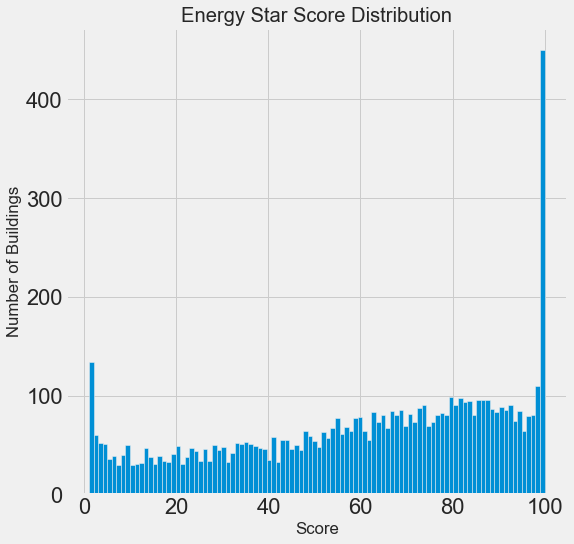

In [60]:
figsize(8,8)

plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100)
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

# ML Models

## Treatment on Missing values

In [63]:
imputer = SimpleImputer(strategy = 'median')

imputer.fit(train_features)

X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [64]:
print('Missing values in training features:', np.sum(np.isnan(X)))
print('Missing values in testing features:',np.sum(np.isnan(X_test)))

Missing values in training features: 0
Missing values in testing features: 0


In [65]:
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Feature scaling

In [66]:
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

## Measure metrics

In [67]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    model.fit(X,y)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [69]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' %lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [70]:
svm = SVR(C=1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [82]:
random_forest = RandomForestRegressor(random_state = 42)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5367


In [81]:
gradient_boosted = GradientBoostingRegressor(random_state = 42)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0119


In [75]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = fit_and_evaluate(knn)

print('K_Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' %knn_mae)

K_Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


Text(0.5, 1.0, 'Model Comparison on Test MAE')

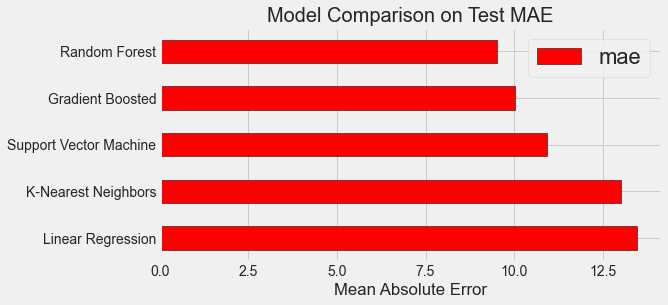

In [78]:
plt.style.use('fivethirtyeight')
figsize(8,4)

model_comparison = pd.DataFrame({'model':['Linear Regression',
                                          'Support Vector Machine',
                                          'Random Forest',
                                          'Gradient Boosted',
                                          'K-Nearest Neighbors'],
                                 'mae': [lr_mae,
                                         svm_mae,
                                         random_forest_mae,
                                         gradient_boosted_mae,
                                         knn_mae]})

model_comparison.sort_values('mae',ascending = False).plot(x = 'model',
                                                           y = 'mae',
                                                           kind = 'barh',
                                                           color = 'red',
                                                           edgecolor = 'black')

plt.ylabel("")
plt.yticks(size = 14)

plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)

plt.title('Model Comparison on Test MAE', size = 20)

# Optimization

## Randomized Search and Grid Search

In [83]:
loss = ['ls','lad','huber']

n_estimators = [100, 500, 900, 1100, 1500]

max_depth = [2,3,5,10, 15]

min_samples_leaf = [1,2,4,6,8]

min_samples_split = [2,4,6,10]

max_features = ['auto','sqrt','log2',None]

hyperparameter_grid = {'loss':loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf':min_samples_leaf,
                       'min_samples_split':min_samples_split,
                       'max_features':max_features}

In [86]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = hyperparameter_grid,
                               cv = 4, n_iter = 25,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1,
                               return_train_score = True,
                               random_state = 42)

In [87]:
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemb

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemb

In [88]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score',ascending = False)
random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      25.231720      0.141273         0.019706        0.001530   
3       24.941815      0.261123         0.023750        0.004941   
9       16.143514      0.109143         0.014244        0.000361   
0        3.727842      0.016089         0.005910        0.000164   
7       13.993424      0.050883         0.015360        0.000820   
10     126.484520      0.831028         0.083191        0.005022   
19      34.089774      0.300004         0.025400        0.002407   
2       77.675019      1.770798         0.051441        0.003124   
16      41.142581      0.220874         0.038534        0.000797   
21      10.157069      0.385537         0.031703        0.004137   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
12                500                       6                      6   
3                 500                       6                      8   
9                 500                       4                      2   
0                 100                       2                      6   
7                 500                       4                      6   
10               1100                      10                      6   
19               1100                       6                      2   
2                 500                       4                      2   
16               1500                       4                      6   
21                500                       6                      4   

   param_max_features param_max_depth param_loss  \
12               None               5        lad   
3                None               5      huber   
9                auto               3      huber   
0                auto               5         ls   
7                auto               3         ls   
10               None              10      huber   
19               auto               3        lad   
2                auto              10      huber   
16               None               3         ls   
21               log2               5      huber   

                                               params  split0_test_score  \
12  {'n_estimators': 500, 'min_samples_split': 6, ...          -8.924621   
3   {'n_estimators': 500, 'min_samples_split': 6, ...          -8.872066   
9   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.062882   
0   {'n_estimators': 100, 'min_samples_split': 2, ...          -9.100775   
7   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.147703   
10  {'n_estimators': 1100, 'min_samples_split': 10...          -9.193406   
19  {'n_estimators': 1100, 'min_samples_split': 6,...          -9.350800   
2   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.333559   
16  {'n_estimators': 1500, 'min_samples_split': 4,...          -9.248455   
21  {'n_estimators': 500, 'min_samples_split': 6, ...          -9.365194   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
12          -8.775078          -9.325044          -9.037550        -9.015573   
3           -8.904065          -9.317120          -9.075047        -9.042074   
9           -9.043722          -9.442664          -9.197954        -9.186805   
0           -9.026538          -9.456636          -9.201011        -9.196240   
7           -9.199444          -9.698622          -9.358627        -9.351099   
10          -9.254552          -9.565642          -9.464933        -9.369633   
19          -9.382812          -9.475236          -9.291753        -9.375150   
2           -9.249347          -9.599790          -9.328477        -9.377793   
16          -9.315932          -9.797820          -9.427920        -9.447532   
21          -9.286988          -9.751767          -9.409179        -9.453282   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
12        0.201473                1           -6.934705           -6.837958   
3         0.1

In [89]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [90]:
tree_grid = {'n_estimators':[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]}

model = GradientBoostingRegressor(loss = 'lad',
                                  max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

grid_search = GridSearchCV(estimator = model,
                           param_grid = tree_grid,
                           cv = 4,
                           scoring = 'neg_mean_absolute_error',
                           verbose = 1,
                           n_jobs = -1,
                           return_train_score = True)

In [91]:
grid_search.fit(X,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Text(0.5, 1.0, 'Performance vs Number of Trees')

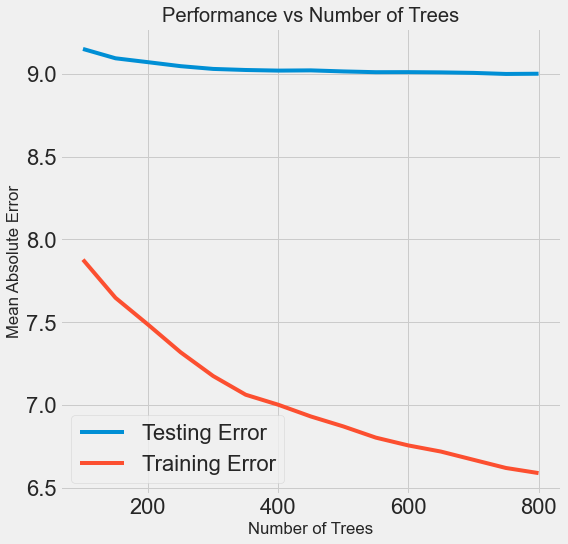

In [92]:
results = pd.DataFrame(grid_search.cv_results_)

figsize(8,8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Performance vs Number of Trees')

In [93]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      39.086092      0.232469         0.026778        0.000908   
14      31.664274      0.238580         0.019205        0.000618   
12      37.922933      0.217063         0.027612        0.002931   
11      34.212017      0.246794         0.027819        0.004047   
9       33.839147      0.120507         0.022762        0.000162   

   param_n_estimators                 params  split0_test_score  \
13                750  {'n_estimators': 750}          -8.901092   
14                800  {'n_estimators': 800}          -8.903857   
12                700  {'n_estimators': 700}          -8.904269   
11                650  {'n_estimators': 650}          -8.906208   
9                 550  {'n_estimators': 550}          -8.918502   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -8.751699          -9.298411          -9.049730        -9.000233   
14          -8.758299          -9.296941          -9.047485        -9.001645   
12          -8.755862          -9.312990          -9.053755        -9.006719   
11          -8.755401          -9.325190          -9.052215        -9.009754   
9           -8.756938          -9.325492          -9.042721        -9.010913   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.201840                1           -6.716494           -6.660453   
14        0.198797                2           -6.689643           -6.648109   
12        0.205815                3           -6.743886           -6.695770   
11        0.210191                4           -6.778068           -6.721452   
9         0.207975                5           -6.874737           -6.781878   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -6.520818           -6.579989         -6.619438         0.074807  
14           -6.486269           -6.530287         -6.588577         0.083101  
12           -6.611240           -6.624919         -6.668953         0.053861  
11           -6.708191           -6.666758         -6.718617         0.039814  
9            -6.809121           -6.745712         -6.802862         0.047201

# Evaluate on test set

In [94]:
default_model = GradientBoostingRegressor(random_state = 42)

final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=750,
                          random_state=42)

In [95]:
%%timeit -n 1 -r 5
default_model.fit(X,y)

1.88 s ± 74.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [96]:
%%timeit -n 1 -r 5
final_model.fit(X,y)

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ense

25.9 s ± 376 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [97]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f' % mae(y_test, default_pred))
print('Final model performance on the test set: MAE = %0.4f' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0119
Final model performance on the test set: MAE = 9.0474


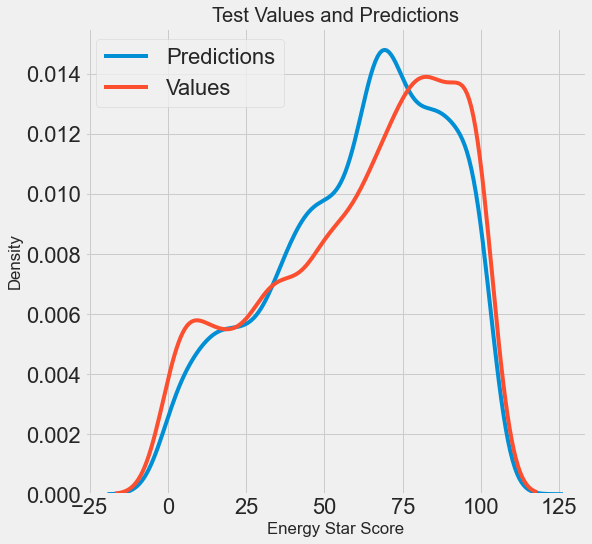

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ense

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ense

In [98]:
figsize(8,8)

sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Test Values and Predictions')
plt.legend()

Text(0.5, 1.0, 'Distribution of Residuals')

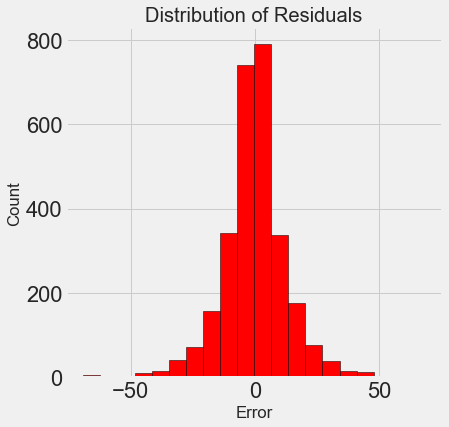

In [99]:
figsize(6,6)

residuals = final_pred - y_test

plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

import lime
import lime.lime_tabular

# Explanation

## Feature Importance

In [107]:
feature_results = pd.DataFrame({'feature':list(train_features.columns),
                                'importance':final_model.feature_importances_})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop = True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.441652
1  Weather Normalized Site Electricity Intensity ...    0.252588
2      Water Intensity (All Water Sources) (gal/ft²)    0.052963
3  log_Water Intensity (All Water Sources) (gal/ft²)    0.033382
4                                        Property Id    0.027111
5                               DOF Gross Floor Area    0.024714
6      Largest Property Use Type_Multifamily Housing    0.022205
7                                         Year Built    0.021092
8  Largest Property Use Type_Non-Refrigerated War...    0.019652
9        log_Direct GHG Emissions (Metric Tons CO2e)    0.019160

Text(0.5, 1.0, 'Feature Importances from Random Forest')

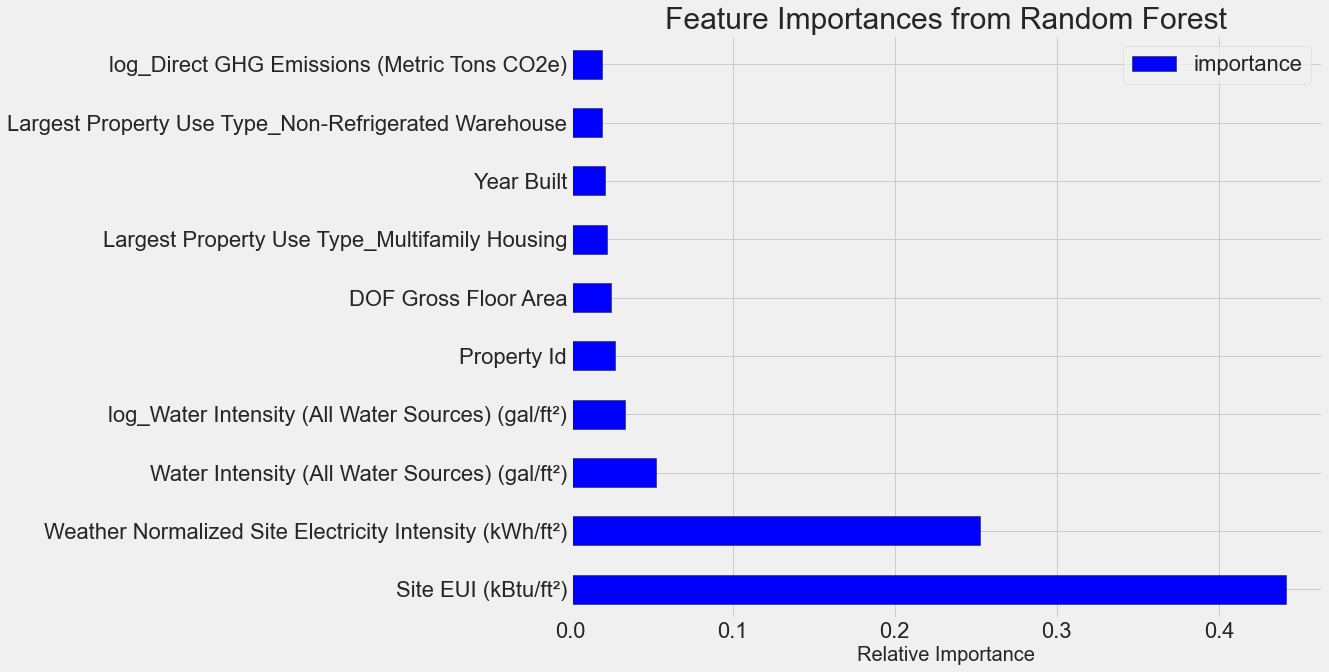

In [108]:
from IPython.core.pylabtools import figsize

figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue')
plt.xlabel('Relative Importance', size = 20)
plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30)

## Feature selection based on importance

In [109]:
# 提取最重要特征的名称
most_important_features = feature_results['feature'][:10]

# 找到与每个特征名称对应的索引
indices = [list(train_features.columns).index(x) for x in most_important_features]

# 数据集中只保留最重要的特征
X_reduced = X[:,indices]
X_test_reduced = X_test[:,indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [110]:
lr = LinearRegression()

# Fit on full set of features - 在全部特征上拟合并测试
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features - 在10个最重要的特征上拟合并测试（即减少后的特征上）
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4651.
Linear Regression Reduced Results: MAE = 14.4016.


In [111]:
# 使用相同的超参数创建模型
model_reduced = GradientBoostingRegressor(loss='lad', 
                                          max_depth=5, 
                                          max_features=None, 
                                          min_samples_leaf=6, 
                                          min_samples_split=6,  
                                          n_estimators=800, 
                                          random_state=42)

#  在10个最重要的特征上拟合并测试（即减少后的特征上） - Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


Gradient Boosted Reduced Results: MAE = 9.5039


## Locally Interpretable Model-agnostic Explanations

In [112]:
# 找到残差
residuals = abs(model_reduced_pred - y_test)
    
# 提取最差和最好的预测
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [113]:
# 创造一个解释器对象
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 13.4614
Actual Value: 96.0000


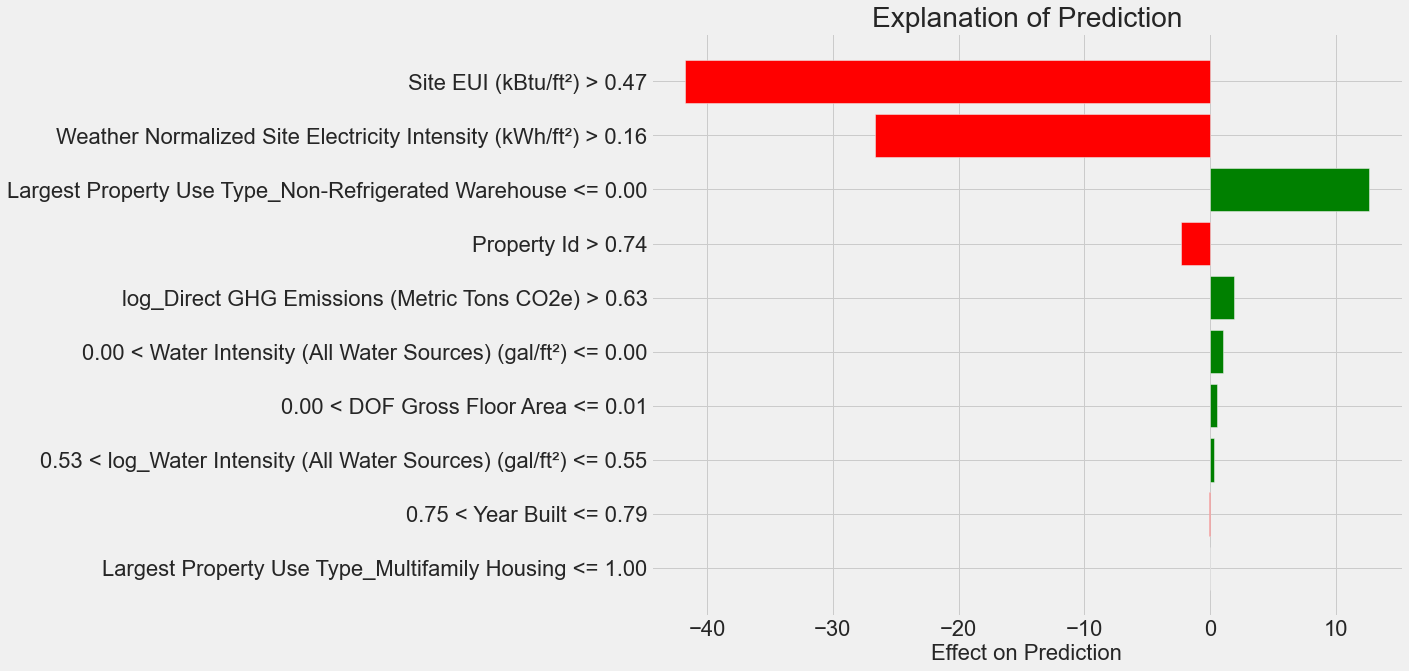

In [114]:
# 显示最差实例的预测值和真实值
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
# 最差预测的解释
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
# 画出预测解释
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [115]:
wrong_exp.show_in_notebook(show_predicted_value=False)

In [116]:
train_features.describe()

Order   Property Id  DOF Gross Floor Area   Year Built  \
count   6622.000000  6.622000e+03          6.590000e+03  6622.000000   
mean    7420.259740  3.649956e+06          1.611635e+05  1948.317729   
std     4220.064155  1.044968e+06          2.569749e+05    29.885053   
min       21.000000  7.365000e+03          5.002800e+04  1649.000000   
25%     3695.250000  2.769788e+06          6.519200e+04  1927.000000   
50%     7374.500000  3.324127e+06          9.161600e+04  1940.000000   
75%    11165.000000  4.409690e+06          1.551560e+05  1964.000000   
max    14993.000000  5.990844e+06          8.512479e+06  2019.000000   

       Number of Buildings - Self-reported    Occupancy  Site EUI (kBtu/ft²)  \
count                          6622.000000  6622.000000          6622.000000   
mean                              1.285563    99.017668            80.122350   
std                               3.892317     5.666364            32.013067   
min                               0.000000     0.000000             0.000000   
25%                               1.000000   100.000000            62.700000   
50%                               1.000000   100.000000            78.500000   
75%                               1.000000   100.000000            95.900000   
max                             140.000000   100.000000           204.800000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                        6296.000000         
mean                                            6.973713         
std                                             5.257358         
min                                             0.000000         
25%                                             3.800000         
50%                                             5.100000         
75%                                             8.500000         
max                                            51.000000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        5649.000000            
mean                                            0.477111            
std                                             0.351980            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                             1.900000            

       Water Intensity (All Water Sources) (gal/ft²)     Latitude  \
count                                    4502.000000  5370.000000   
mean                                      108.922719    40.754060   
std                                       681.005299     0.082595   
min                                         0.000000    40.521360   
25%                                        29.062500    40.701918   
50%                                        46.750000    40.759206   
75%                                        72.495000    40.822984   
max                                     21689.360000    40.911797   

         Longitude  Community Board   Census Tract  \
count  5370.000000      5370.000000    5370.000000   
mean    -73.955909         7.343203    5043.087896   
std       0.044884         3.952419   13028.985484   
min     -74.224464         1.000000       1.000000   
25%     -73.983939         5.000000     105.000000   
50%     -73.962474         7.000000     218.000000   
75%     -73.929310        10.000000     549.000000   
max     -73.749057        18.000000  105804.000000   

       log_Direct GHG Emissions (Metric Tons CO2e)  \
count                                  6194.000000   
mean                                      5.560492   
std                                       1.150166   
min                                      -2.302585   
25%                                       5.2699

Prediction: 100.0000
Actual Value: 100.0000


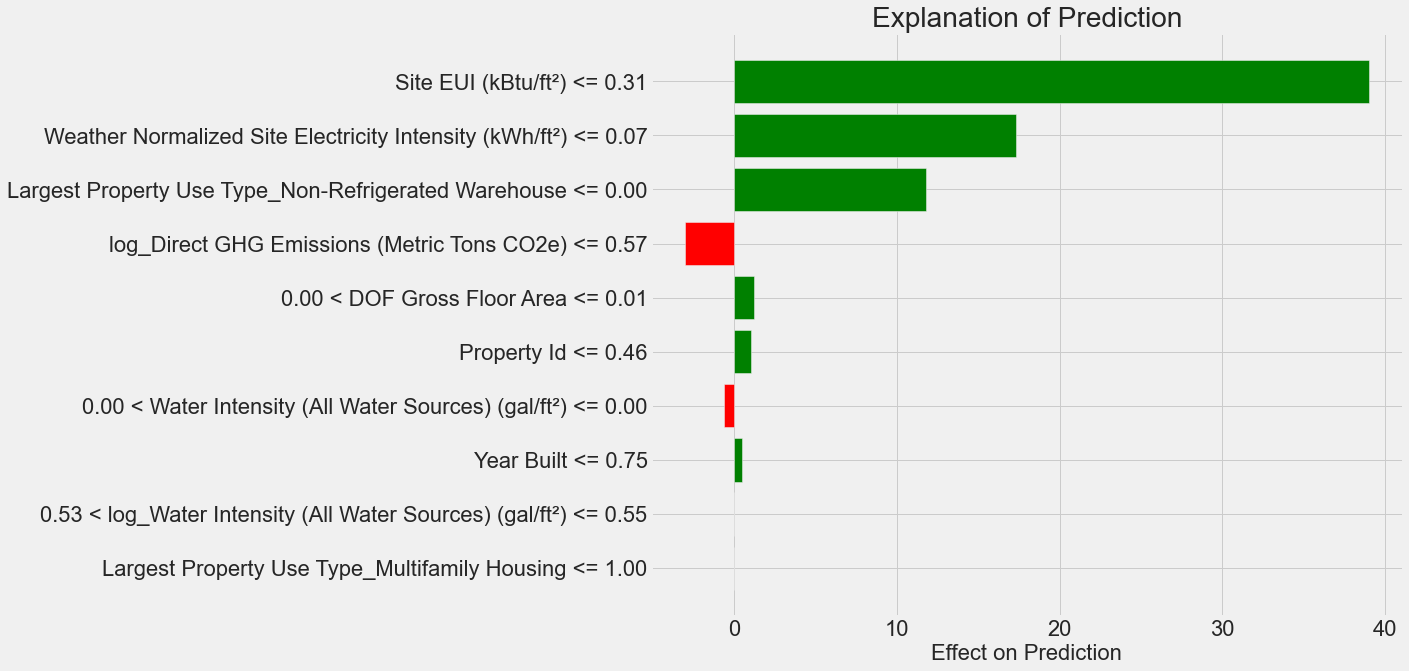

In [117]:
# Display the predicted and true value for the  correct instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for  correct prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [118]:
right_exp.show_in_notebook(show_predicted_value=False)